In [1]:
import numpy as np
import cv2
from improve_quality.quality_imp import quality_imp
from object_detection.object_detection import (
    fill_rings, 
    get_ring_coordinates, 
    get_double_bond_image,
    get_d_bond_and_letter_coordinates
)
from matplotlib import pyplot as plt

In [29]:
# improve image quality
image = cv2.imread("mol.png")

qual_img = quality_imp(image, (6,6))

# fill rings
img2 = fill_rings(qual_img)

rings, img_rings = get_ring_coordinates(img2)
#print(rings)

# double_bonds image
img = image.copy()
mask = get_double_bond_image(img)

img, letters, double_bond = get_d_bond_and_letter_coordinates(mask)

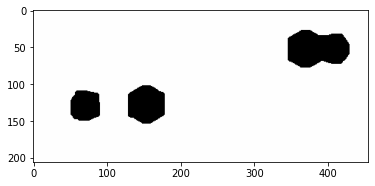

In [30]:
img_rings = 255-img_rings
plt.imshow(img_rings)


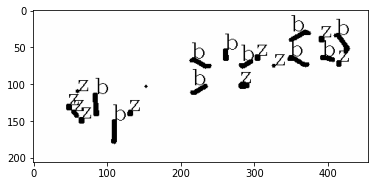

In [31]:
plt.imshow(img)

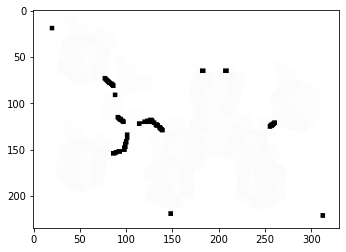

In [25]:
img = cv2.erode(mask,np.ones((3,3),np.uint8),iterations = 1)  
img_with_only_lines = image + (254-img_rings) +(254-img)

img_with_only_lines = cv2.erode(img_with_only_lines,np.ones((8,8),np.uint8),iterations = 1)  
img_with_only_lines = cv2.dilate(img_with_only_lines,np.ones((4,4),np.uint8),iterations = 1)

plt.imshow(img_with_only_lines) 


In [32]:
from pytesseract import Output
import pytesseract
import argparse
import cv2


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\pytesseract\tesseract.exe'

img = cv2.imread("mol.png")
results = pytesseract.image_to_data(img, output_type=Output.DICT)
print(results)

{'level': [1, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1], 'left': [0, 0, 0, 0, 0], 'top': [0, 0, 0, 0, 0], 'width': [455, 0, 0, 0, 0], 'height': [206, 179, 179, 179, 179], 'conf': ['-1', '-1', '-1', '-1', 95], 'text': ['', '', '', '', '']}
